Algorithm A: Predictive Modeling with Machine Learning
1. Feature Engineering with Decision Trees: Utilize decision trees to identify key features that distinguish different customer segments.
2. Gaussian Mixture Model -> Expectation-Maximization (EM) for Data Imputation: Implement EM algorithm to handle missing data or to refine the customer segments.
3. Classification with Artificial Neural Network (ANN): Use an ANN (multi-layer perceptron) to classify customers into segments based on their shopping behavior and the features identified.
- 2 layers with each 100 and 50 neuros, activation: ReLU

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
file_path = 'Train.csv'  # Update this if the file path changes
data = pd.read_csv(file_path)

c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


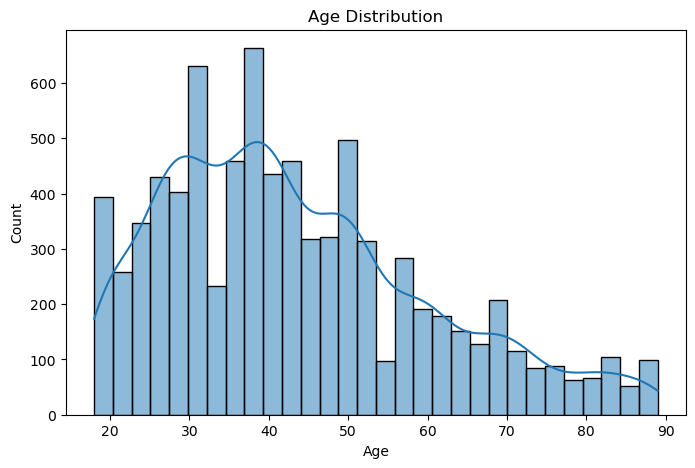

c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


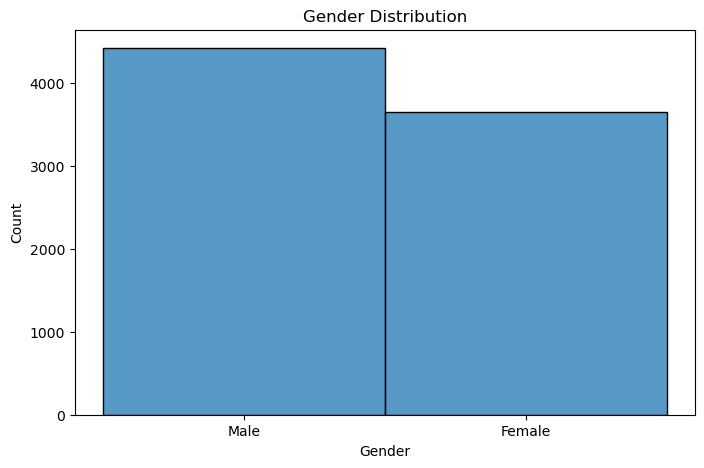

c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


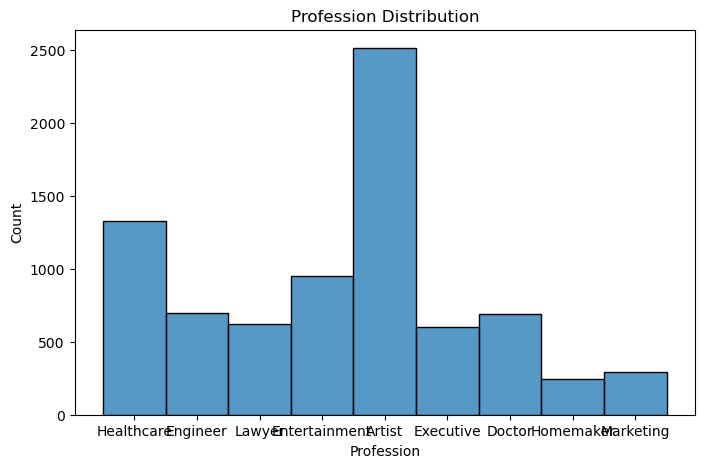

In [10]:
# Visualizing Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualizing Gender distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Gender'], bins=30)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualizing Gender distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Profession'], bins=30)
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

In [11]:
# Handle missing values for categorical columns
data.fillna({'Ever_Married': 'Unknown', 'Graduated': 'Unknown', 'Profession': 'Unknown', 'Var_1': 'Unknown', 'Work_Experience': -1, 'Family_Size': -1}, inplace=True)

# Define features and target
features = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']
target = 'Segmentation'

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Preprocessing: Separate handling for numeric and categorical features
numeric_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = [feat for feat in features if feat not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

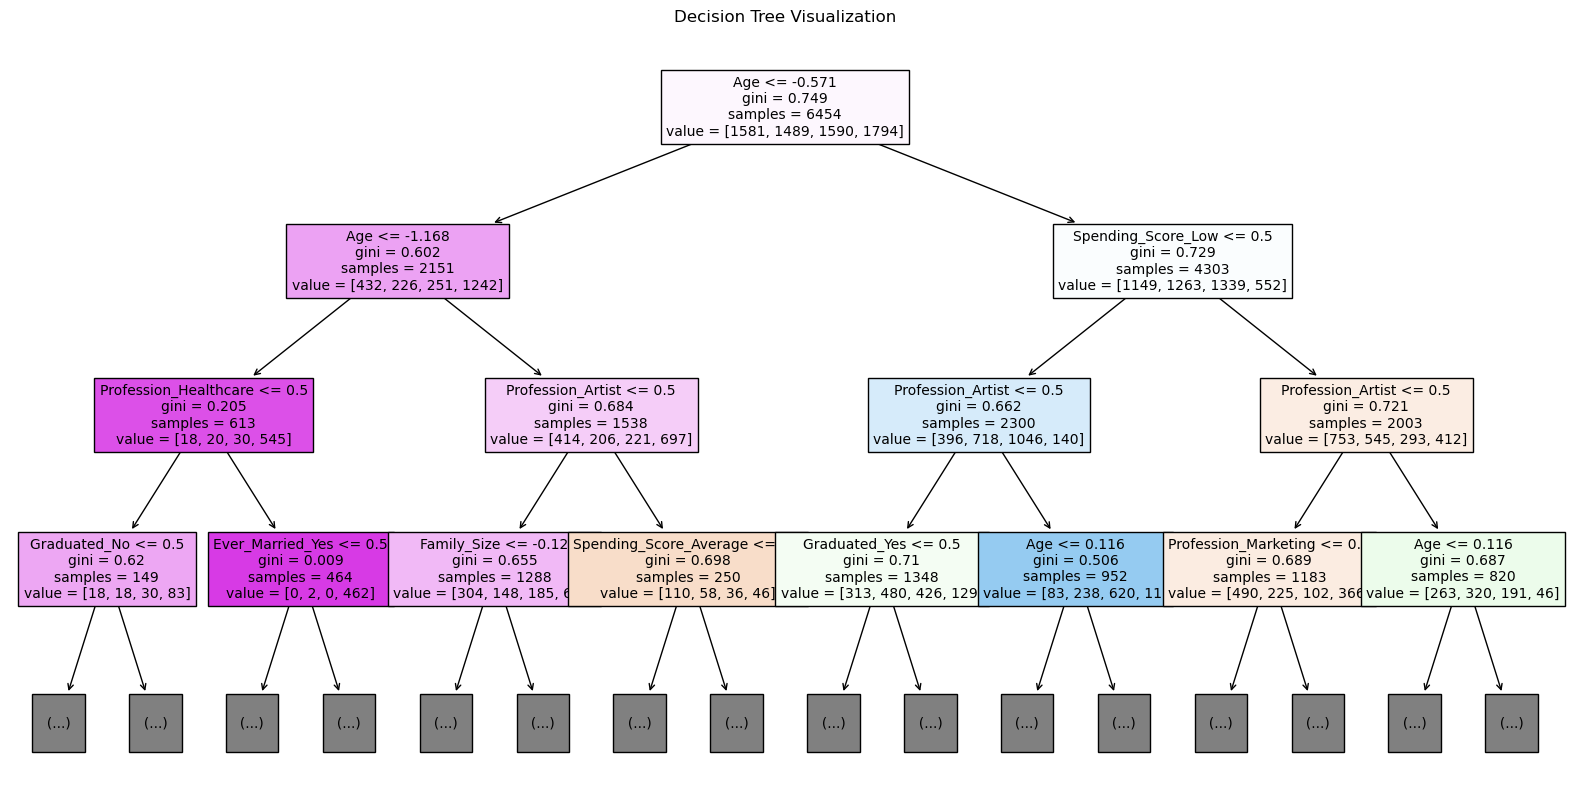

In [12]:
# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert sparse matrix to dense array
X_train_preprocessed_dense = X_train_preprocessed.toarray()
X_test_preprocessed_dense = X_test_preprocessed.toarray()

# Decision Tree for feature importance
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_preprocessed_dense, y_train)

# Extract feature names for numeric columns
numeric_features_transformed = numeric_features  # These remain unchanged
categorical_features_transformed = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()

# Function to generate feature names
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    # Loop over all transformers
    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(pipe, 'get_feature_names_out'):
                # if pipeline has get_feature_names_out method
                feature_names = pipe.get_feature_names_out(features)
            else:
                feature_names = features
            output_features.extend(feature_names)
        else:
            # if remainder, use the original feature names
            output_features.extend(features)

    return output_features

# Generate all transformed feature names
all_features_transformed = get_feature_names(preprocessor)

# Verify the length matches the number of features used in the tree
if len(all_features_transformed) != X_train_preprocessed_dense.shape[1]:
    raise ValueError("The number of feature names does not match the number of features used in the model.")

# Plotting Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=all_features_transformed, max_depth=3, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

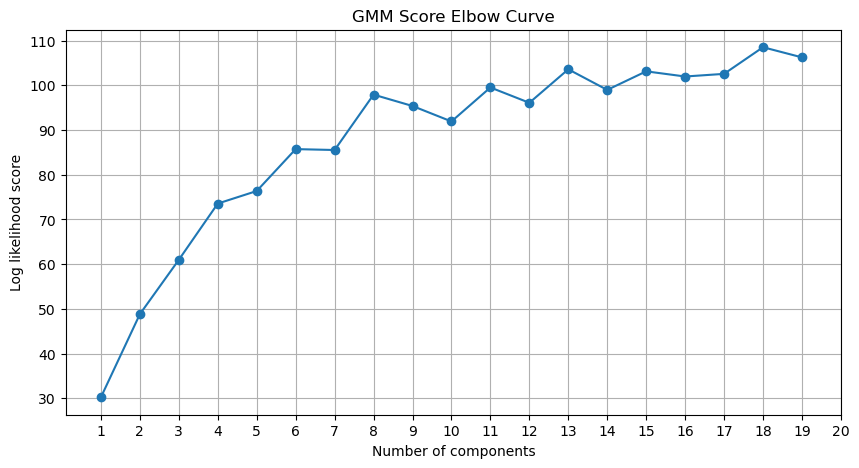

In [13]:
# Define the range of clusters to try
n_components_range = range(1, 20)
scores = []

# Calculate the scores for different number of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_train_preprocessed_dense)
    scores.append(gmm.score(X_train_preprocessed_dense))

# Plotting the elbow curve for the log likelihood (score)
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, scores, marker='o')
plt.xticks(range(1, 21, 1))
plt.title('GMM Score Elbow Curve')
plt.xlabel('Number of components')
plt.ylabel('Log likelihood score')
plt.grid(True)
plt.show()

c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


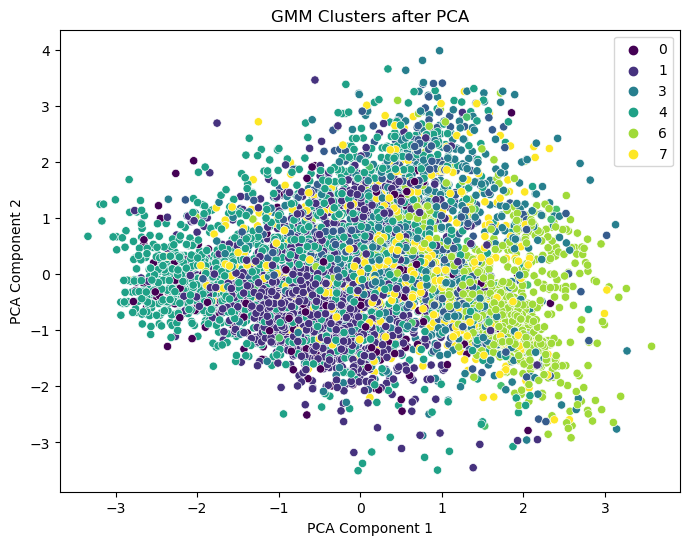

Silhouette Coefficient: 0.04686308627166396
Calinski-Harabasz Index: 67.40225745731381
Davies-Bouldin Index: 3.5849327236567126


In [21]:
# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=8, random_state=42)  # Adjust n_components as needed
gmm.fit(X_train_preprocessed_dense)

# Add the GMM cluster labels as a feature
train_cluster_labels = gmm.predict(X_train_preprocessed_dense)
test_cluster_labels = gmm.predict(X_test_preprocessed_dense)

# PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocessed_dense)

# Plotting GMM Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_cluster_labels, palette='viridis')
plt.title('GMM Clusters after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Silhouette Coefficient
silhouette = silhouette_score(X_test_preprocessed_dense, test_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_test_preprocessed_dense, test_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_test_preprocessed_dense, test_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

In [15]:
# Neural Network Classifier with clustering feature
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
nn_clf.fit(X_train_preprocessed_dense, y_train)

# Function to visualize the structure of MLP
def visualize_mlp_structure(mlp_clf):
    n_layers = mlp_clf.n_layers_
    layer_sizes = mlp_clf.coefs_

    print(f"MLP Structure:\n")
    print(f"Number of Layers: {n_layers}")
    print("Layer-wise neuron count (including input and output layers):")

    # Input Layer
    print(f"  Input Layer: {mlp_clf.coefs_[0].shape[0]} neurons")

    # Hidden Layers
    for i, layer in enumerate(mlp_clf.coefs_[:-1]):
        print(f"  Hidden Layer {i+1}: {layer.shape[1]} neurons")

    # Output Layer
    print(f"  Output Layer: {mlp_clf.coefs_[-1].shape[1]} neurons")

    print("\nActivation Function for Hidden Layers: ReLU")
    print(f"Output Layer Activation Function: {mlp_clf.out_activation_}")

# Visualize the MLP structure
visualize_mlp_structure(nn_clf)

MLP Structure:

Number of Layers: 4
Layer-wise neuron count (including input and output layers):
  Input Layer: 32 neurons
  Hidden Layer 1: 100 neurons
  Hidden Layer 2: 50 neurons
  Output Layer: 4 neurons

Activation Function for Hidden Layers: ReLU
Output Layer Activation Function: softmax


c:\Users\1\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
y_pred = nn_clf.predict(X_test_preprocessed_dense)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.38      0.35      0.36       391
           B       0.38      0.36      0.37       369
           C       0.49      0.53      0.51       380
           D       0.63      0.64      0.63       474

    accuracy                           0.48      1614
   macro avg       0.47      0.47      0.47      1614
weighted avg       0.48      0.48      0.48      1614



A~D: segmentation
- Precision: Ratio of correctly predicted positive observations to the total predicted positives
- Recall: Ratio of correctly predicted positive observations to all observations in the actual class.
- F1-Score: Weighted average of Precision and Recall. 
- Support: Number of actual occurrences of the class in the specified dataset.
- Accuracy: Ratio of correctly predicted observations to the total observations.
- Macro Average: Macro average computes the metric independently for each class and then takes the average.
- Weighted Average: Takes into account the imbalance in the dataset by weighting the score of each class by its presence in the actual data.